# SMOOTHING TECHNIQUES

## Smoothing

- **Definition:** A technique to remove noise (random fluctuations) from a time series  
- Helps highlight underlying patterns or trends that are otherwise hidden  
- Applies mathematical methods to smooth out sharp ups and downs  
- Instead of reacting to every spike or dip, smoothing creates a gentler curve of the data  
- **Goal:**  
    - Reduce short-term irregular variations so trends, seasonality, or cycles can be clearly seen  
    - Provide a baseline forecasting method  
    - Compare more advanced models against this baseline  

## Building a Model

To build a forecasting model, we follow these steps:

1. **Problem & Data Understanding**  
    - Define what needs to be forecasted  
    - Collect historical time series data with consistent intervals  

2. **Data Preprocessing**  
    - Handle missing values: impute or interpolate  
    - Remove or adjust outliers if they are not meaningful  
    - Convert data into a stationary series if required  

3. **Exploratory Analysis**  
    - Plot the series, identify trends, seasonality, cycles, or noise  
    - Use Autocorrelation and PACF plots to understand lags  
    - Perform tests like the ADF test for stationarity  

4. **Choose Forecasting Approach**  
    - Two major approaches:  
        1. **Statistical Models**  
            - ARIMA / SARIMA  
            - Exponential smoothing  
        2. **Machine Learning / Deep Learning Models**  
            - Regression with lag features  
            - Random Forest / XGBoost  
            - RNN / LSTM / Transformer models  

5. **Model Training**  
    - Split data into train and test sets  
    - Fit the chosen model on training data  
    - Tune hyperparameters  

6. **Model Evaluation**  
    - Compare forecast accuracy using metrics like MAE, RMSE, and MAPE  
    - Check if residuals look like random noise  

7. **Forecasting Deployment**  
    - Generate future predictions  
    - Update the model regularly as new data arrives  
    - Deploy into production  

## Types of Forecasting Models

1. **Simple Average Forecast**  
   - Forecast using the mean of all past observations  
   - Naive but provides a baseline forecast  
   - $\mathrm{\hat{y}_{t+1}} = \frac{y_1 + y_2 + ... + y_{t}}{t}$  

2. **Moving Average Forecast**  
   - Forecast using the mean of the last *k* values  
   - Handles short-term fluctuations better  
   - Con: lags behind the series  
   - $\mathrm{\hat{y}_{t+1}} = \frac{y_{t} + y_{t-1} + ... + y_{t-k+1}}{k}$  

3. **Exponential Smoothing Technique**  
   - Forecast by giving more weight to recent observations  
   - $\hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y}_t$  
   - where $0 < \alpha < 1$ (smoothing factor)  
   - If $\alpha$ is high, recent data is more important  
   - If $\alpha$ is low, older data still influences predictions  

4. **Double Exponential Smoothing**  
   - Handles trends in the data  
   - Uses two equations:  
     - Level: current estimate of the series  
     - Trend: growth rate  

5. **Holt-Winters Method**  
   - Handles both trend and seasonality  
   - Variants:  
     - Additive: constant seasonality  
     - Multiplicative: seasonality grows with the trend  
   - Widely used in practice  

## Model Validation

### Need for Validation  
- Ensures the model generalizes to unseen future data  
- A random train/test split would break time order  

### Ways to Validate the Model  
1. **Train/Test Split**  
   - Train on older records and test on newer records  

2. **Rolling Window Validation**  
   - Fixed-size training window that moves forward with each iteration  
   - Window size remains the same throughout  

3. **Expanding Window Validation**  
   - Starts with a smaller fixed-size training window  
   - Increases window size with each iteration  
   - Allows growth of training data  

4. **Cross-Validation**  
   - Retrains step by step, moving forward through time  

5. **Blocked Cross-Validation**  
   - Splits the series into contiguous blocks  
   - Ensures no future data leaks into the past during validation  

### Accuracy Metrics  

Some common metrics used to validate models are:  
- **MAE** (Mean Absolute Error)  
- **MSE** (Mean Squared Error)  
- **RMSE** (Root Mean Squared Error)  
- **MAPE** (Mean Absolute Percentage Error)  

/home/mht/.my-env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


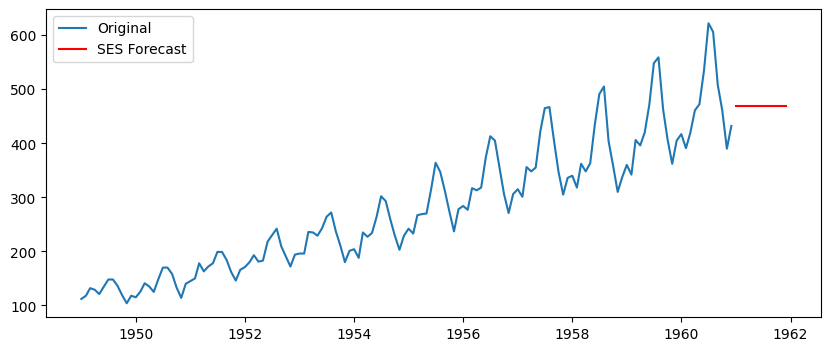

/home/mht/.my-env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


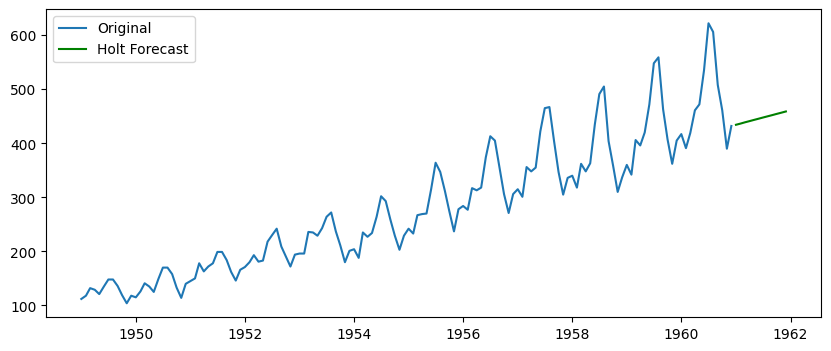

/home/mht/.my-env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


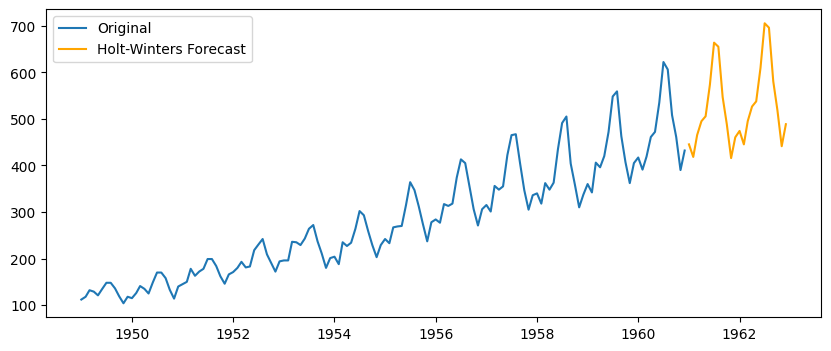

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
y = data['Passengers']

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(y).fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_model.forecast(12)

plt.figure(figsize=(10,4))
plt.plot(y, label='Original')
plt.plot(ses_forecast, label='SES Forecast', color='red')
plt.legend()
plt.show()

# Holt’s Linear Trend (Double ES)
holt_model = ExponentialSmoothing(y, trend='add', seasonal=None).fit()
holt_forecast = holt_model.forecast(12)

plt.figure(figsize=(10,4))
plt.plot(y, label='Original')
plt.plot(holt_forecast, label='Holt Forecast', color='green')
plt.legend()
plt.show()

# Holt-Winters Seasonal
hw_model = ExponentialSmoothing(y, trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(24)

plt.figure(figsize=(10,4))
plt.plot(y, label='Original')
plt.plot(hw_forecast, label='Holt-Winters Forecast', color='orange')
plt.legend()
plt.show()